## generator test

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath("../signals"))
sys.path.append(os.path.abspath("../data"))



## dataset test

Shape of X: (2, 150)
Shape of y: (2,)
Labels: [0 1]


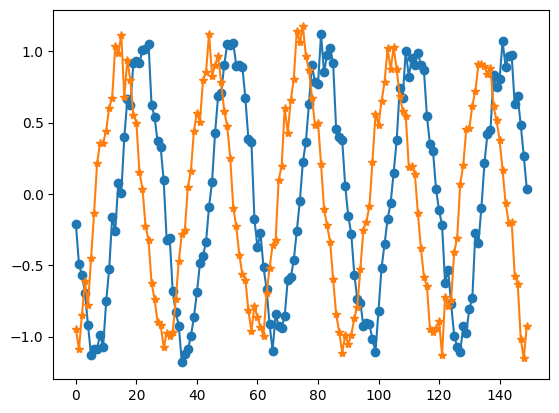

In [2]:
from dataset import create_labeled_dataset, get_kfold_splits


# Signal configuration: use sine signals with different freqs
class_configs = [
    (0, 'sine', {'n_points': 300, 'n_periods': 5, 'args': [5, 0, 0.1]}),
    (1, 'sine', {'n_points': 300, 'n_periods': 5, 'args': [5.1, 0, 0.1]}),
]

# Generate data
n_samples_per_class = 1
X, y = create_labeled_dataset(class_configs, n_samples_per_class, return_time=False, subsample_step=10, transient=0)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Labels:", np.unique(y))

plt.plot(X[0], 'o-')
plt.plot(X[1], '*-')
plt.show()

Shape of X: (2, 45)
Shape of y: (2,)
Labels: [0 1]


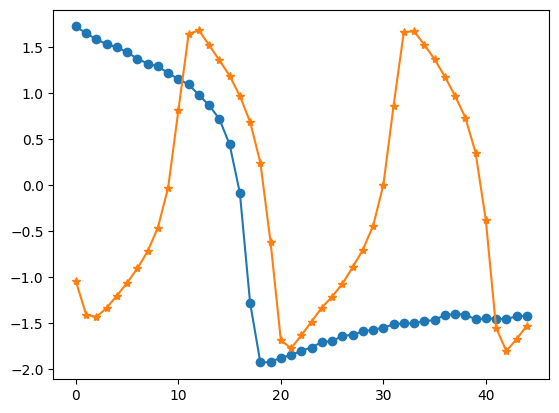

In [3]:
fhn_args = [0.8, 0.7, 0.08, 0.5, 0.02]  # [b0, b1, epsilon, I, noise_strength]
fhn_kwargs = {
    'length': 500,
    'dt': 0.1,
    'x0': [0, 0],
    'args': fhn_args
}

class_configs = [
    (0, 'fhn', {'length':500, 'dt': 0.1, 'x0': [0,0], 'args':[0.8, 0.7, 0.08, 0.5, 0.02]}),
    (1, 'fhn', {'length':500, 'dt': 0.1, 'x0': [0,0], 'args':[0.1, 1, 0.2, 0.0, 0.01]} ),
]

n_samples_per_class = 1
X, y = create_labeled_dataset(class_configs, n_samples_per_class, return_time = False, subsample_step=10, transient=50)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Labels:", np.unique(y))

plt.plot( X[0, :], 'o-')
plt.plot( X[1, :], '*-')
plt.show()

In [4]:
# After creating your dataset
X, y = create_labeled_dataset(class_configs, n_samples_per_class=10)

# Get K-Fold indices
splits = get_kfold_splits(X, y, n_splits=5)

# Loop through folds
for i, (train_idx, test_idx) in enumerate(splits):
    X_train = [X[j] for j in train_idx]
    X_test  = [X[j] for j in test_idx]
    y_train = [y[j] for j in train_idx]
    y_test  = [y[j] for j in test_idx]
    
    print(f"Fold {i + 1}:")
    print(f"  Train size: {len(X_train)}")
    print(f"  Test size:  {len(X_test)}")


Fold 1:
  Train size: 16
  Test size:  4
Fold 2:
  Train size: 16
  Test size:  4
Fold 3:
  Train size: 16
  Test size:  4
Fold 4:
  Train size: 16
  Test size:  4
Fold 5:
  Train size: 16
  Test size:  4


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for train_idx, test_idx in splits:
    X_train = [X[i] for i in train_idx]
    y_train = [y[i] for i in train_idx]
    X_test = [X[i] for i in test_idx]
    y_test = [y[i] for i in test_idx]
    
    # Flatten or preprocess if needed
    X_train_flat = [x.flatten() for x in X_train]
    X_test_flat = [x.flatten() for x in X_test]
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    clf = SVC()
    clf.fit(X_train_flat, y_train)
    y_pred = clf.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00
Accuracy: 1.00


## features test

Shape of extracted features: (16, 22)


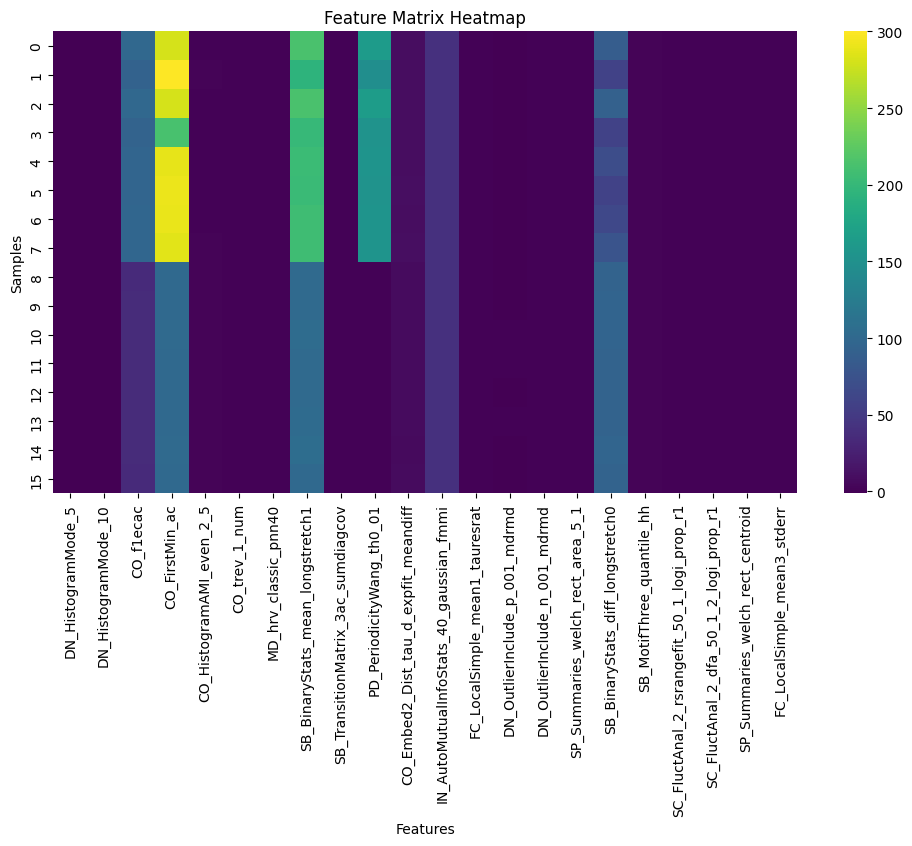

In [6]:
sys.path.append(os.path.abspath("../features"))
import seaborn as sns
from features import extract_features

# Extract features from raw time series
features = extract_features(X_train_flat)
print(f"Shape of extracted features: {features.shape}")

# Plot feature heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(features, cmap='viridis')
plt.title("Feature Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()



In [7]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set path and import
sys.path.append(os.path.abspath("../preprocessing"))
from preprocessing import apply_pca

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
X_pca, pca_model = apply_pca(X_scaled, n_components=2)

# Print explained variance
print("Explained variance ratio:", pca_model.explained_variance_ratio_)

Explained variance ratio: [0.86365388 0.05619397]


In [8]:
print("X shape (features):", features.shape)
print("y shape:", y_train.shape if hasattr(y_train, 'shape') else len(y_train))

X shape (features): (16, 22)
y shape: (16,)


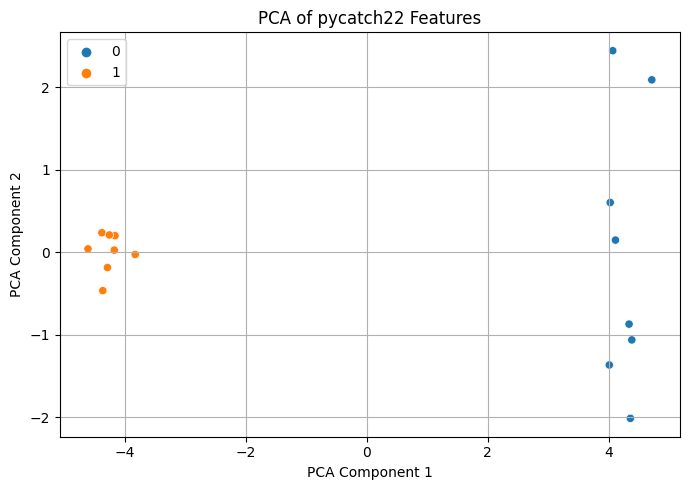

In [9]:
# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of pycatch22 Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
X_pca.shape

(16, 2)

## classification

In [10]:
sys.path.append(os.path.abspath("../models"))
from sklearn.svm import SVC

from classification import evaluate_model_auc

Fold 1 AUC: 1.000
Fold 2 AUC: 1.000
Fold 3 AUC: 1.000
Fold 4 AUC: 1.000
Fold 5 AUC: 1.000
AUCs for each fold: [1.0, 1.0, 1.0, 1.0, 1.0]


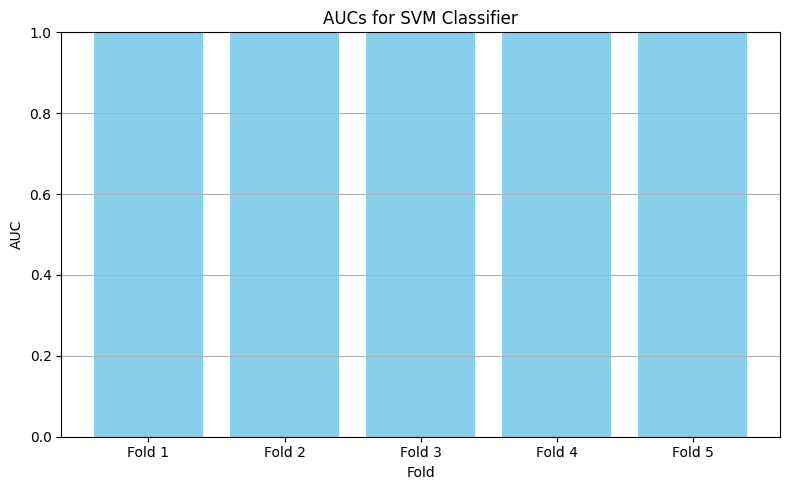

In [15]:
svm = SVC()
aucs = evaluate_model_auc(X, y, svm, splits)
print("AUCs for each fold:", aucs)
# Plot AUCs
plt.figure(figsize=(8, 5))
plt.bar(range(len(aucs)), aucs, color='skyblue')
plt.xlabel("Fold")
plt.ylabel("AUC")
plt.title("AUCs for SVM Classifier")
plt.xticks(range(len(aucs)), [f"Fold {i+1}" for i in range(len(aucs))])
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()